## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from plotnine import *

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [6]:
import pandas as pd
df=pd.read_csv("ha_1.csv")
df = df.dropna()
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [7]:
# Map "diagnosis" to binary values (1 for Disease)
df["diagnosis"] = df["diagnosis"].astype(str).map({"No Disease": 0, "Disease": 1})

X = df[["age", "chol"]]
y = df["diagnosis"]

logistic_pipeline = Pipeline([
    ("model", LogisticRegression())
])

logistic_pipeline.fit(X, y)

logistic_model = logistic_pipeline.named_steps["model"]

intercept = logistic_model.intercept_[0]
coef_age = logistic_model.coef_[0][0]
coef_chol = logistic_model.coef_[0][1]

age_value = 55

logit_50 = np.log(0.5 / (1 - 0.5))
cholesterol_50 = -(logit_50 + intercept + coef_age * age_value) / coef_chol

logit_90 = np.log(0.9 / (1 - 0.9))
cholesterol_90 = -(logit_90 + intercept + coef_age * age_value) / coef_chol

print(f"For a 55-year-old:")
print(f"Cholesterol needed for a 50% chance of heart disease: {cholesterol_50:.2f}")
print(f"Cholesterol needed for a 90% chance of heart disease: {cholesterol_90:.2f}")

For a 55-year-old:
Cholesterol needed for a 50% chance of heart disease: 367.87
Cholesterol needed for a 90% chance of heart disease: 1587.72


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)

lda_intercept = lda_model.intercept_[0]
lda_coef_age = lda_model.coef_[0][0]
lda_coef_chol = lda_model.coef_[0][1]

age_value = 55

logit_50 = np.log(0.5 / (1 - 0.5))
cholesterol_lda_50 = -(logit_50 + lda_intercept + lda_coef_age * age_value) / lda_coef_chol

print(f"For a 55-year-old:")
print(f"Cholesterol needed for a 50% chance of heart disease (LDA): {cholesterol_lda_50:.2f}")

For a 55-year-old:
Cholesterol needed for a 50% chance of heart disease (LDA): 368.24


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVC model with a linear kernel
svc_model = SVC(kernel="linear")

# hyperparam tuning
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svc_model, param_grid, cv=5)
grid_search.fit(X, y)

best_svc = grid_search.best_estimator_

svc_intercept = best_svc.intercept_[0]
svc_coef_age = best_svc.coef_[0][0]
svc_coef_chol = best_svc.coef_[0][1]

age_value = 55

logit_50 = np.log(0.5 / (1 - 0.5))
cholesterol_svc_50 = -(logit_50 + svc_intercept + svc_coef_age * age_value) / svc_coef_chol

print(f"For a 55-year-old:")
print(f"Cholesterol needed for a 50% chance of heart disease (SVC): {cholesterol_svc_50:.2f}")

For a 55-year-old:
Cholesterol needed for a 50% chance of heart disease (SVC): 312.70


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

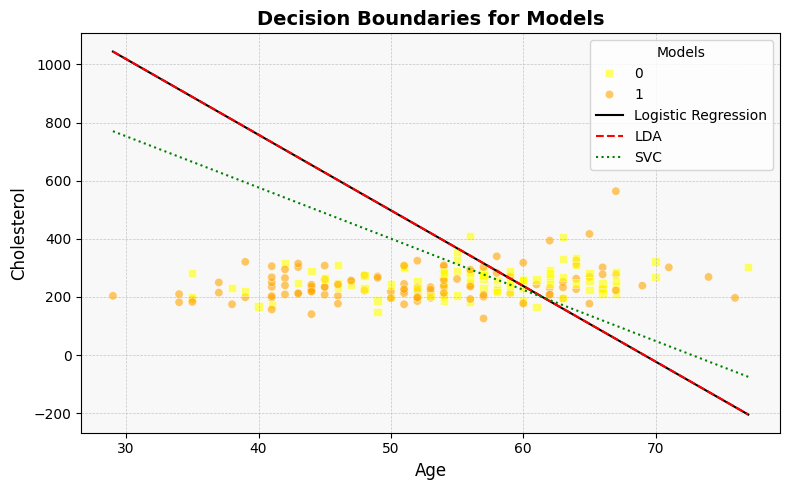

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(
    x=df["age"], y=df["chol"], hue=df["diagnosis"], style=df["diagnosis"],
    palette={0: "yellow", 1: "orange"}, markers=["s", "o"], alpha=0.6, ax=ax
)


# Logistic Regression
x_vals = [min(df["age"]), max(df["age"])]
y_vals_log = [-(intercept + coef_age * x) / coef_chol for x in x_vals]
ax.plot(x_vals, y_vals_log, label="Logistic Regression", color="black", linestyle="-", linewidth=1.5)

# LDA
y_vals_lda = [-(lda_intercept + lda_coef_age * x) / lda_coef_chol for x in x_vals]
ax.plot(x_vals, y_vals_lda, label="LDA", color="red", linestyle="--", linewidth=1.5)

# SVC
y_vals_svc = [-(svc_intercept + svc_coef_age * x) / svc_coef_chol for x in x_vals]
ax.plot(x_vals, y_vals_svc, label="SVC", color="green", linestyle=":", linewidth=1.5)

ax.set_title("Decision Boundaries for Models", fontsize=14, fontweight="bold")
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Cholesterol", fontsize=12)
ax.legend(title="Models", loc="upper right", fontsize=10)

ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_facecolor("#f8f8f8")

plt.tight_layout()
plt.show()

